<h5 align= "right"> Felix Filipi - 2301877590</h5><hr>
<h2 align="center"> Assignment 1 </h2>
<h2 align="center"> Computer Vision </h2>
<hr>

<br><h3>1. WHAT IS IMAGE HISTOGRAM, AND HOW TO TELL WHETHER AN IMAGE HAVE A GOOD CONTRAST FROM ITS HISTOGRAM.</h3>


Image Histogram adalah representasi grafis yang menggambarkan hubungan antara intensitas masing-masing pixel dalam sebuah gambar. Histogram direpresentasikan dalam bentuk bin atau diagram batang yang mana setiap bin mewakili frekuensi / intensitas setiap rentang nilai tertentu. Jika kita ingin <b>meningkatkan kontras</b> maka kita perlu untuk meningkatkan standard deviasi dari histogram frekuensi, sehingga dapat memberikan kontras yang lebih tinggi karena akan membuat frekuensi dari masing masing pixel menjadi lebih merata. Sedangkan untuk <b>mengurangi kontras</b> maka kita perlu untuk mengurangi standard deviasinya sehingga dapat memberikan contrast yang lebih rendah pula, karena frekuensi dari pixel akan menjadi lebih terkonsentrasi pada sebuah puncak primer. 

<img src="https://www.allaboutcircuits.com/uploads/articles/understanding-contrast-histograms-and-standard-deviation-in-digital-imagery-rk-aac-image3.jpg">

<h5 align="center">Gambar di kiri memiliki standard deviasi rendah, sehingga gambar lebih terkonsentrasi pada puncak primer yang menyebabkan gambar memiliki kontras yang rendah. Sedangkan gambar di kanan memiliki standard deviasi tinggi, sehingga memiliki gambar yang lebih terkonsentrasi pada puncak sekunder atau dengan kata lain lebih merata dibandingkan gambar di kiri, sehingga hal ini menyebabkan kontras menjadi lebih baik.</h5>

Sehingga dari penjelasan tersebut, didapatkan kesimpulan bahwa dengan membuat <b>pixel menjadi lebih merata</b> (membuat rentang dan puncak sekunder menjadi lebih menonjol), maka kita dapat <b>meningkatkan kontras</b>. Sedangkan dengan membuat <b>lebih banyak pixel terkonsentrasi ke puncak primer</b> maka kita dapat <b>mengurangi kontras</b> dari gambar. <hr>


<h3>2. LET SAY YOU HAVE A HISTOGRAM OF A LOW CONTRAST IMAGE AS IT IS SHOWN IN THE 	FOLLOWING FIGURE, CAN YOU SKETCH A TRANSFORMATION THAT WILL LIKELY IMPROVE THE 	IMAGE CONTRAST.</h3>

Seperti kita ketahui, dari gambar tersebut dapat diambil kesimpulan bahwa kontras dari gambar rendah karena memiliki puncak primer yang tinggi, yang berarti kontrasnya buruk. Oleh karena itu kita perlu untuk mentransformasi gambar tersebut menjadi gambar dengan kontras yang lebih baik. Ini dapat dilakukan dengan banyak teknik transformasi, namun kita akan membahas mengenai transformasi histogram equalization. 

Histogram equalization sendiri adalah sebuah transformasi yang bekerja dengan cara mendistribusikan ulang nilai frekuensi setiap pixel sehingga dapat meregangkan kontras untuk menghasilkan gambar dengan kontras yang lebih baik. Cara kerja Transformasi ini adalah sebagai berikut:

1. Pastikan gambar dalam grayscale. 
2. Cari nilai frekuensi setiap pixel.
3. Karena kita akan melakukan cumsum, nilainya tentu saja akan sangat besar, oleh karena itu kita perlu untuk melakukan normalisasi pada masing masing pixel dulu, sehingga menghasilkan nilai antara 0-255 dengan cara:

<h1 align="center">$norm = \dfrac{array}{total}$</h1>

4. Lakukan cumulative sum (bisa dilihat di code nomor 3):

<h1 align="center"> $cs = cumsum(norm)$ </h1>

5. Buat transformasi dengan formula sebagai berikut:

<h1 align="center"> $round(cs \times L-1)$</h1>

<h5 align="center">from:</h5>

<img src="https://www.dynamsoft.com/blog/wp-content/uploads/2019/06/General-histogram-equalization-formula.png" align="center">

6. Apply transfrom ke masing masing pixel.

<b>*Note:</b>

$L-1$ disini maksudnya adalah $2^{bit}-1 $
<hr>

<h3>3. WRITE A PROGRAM (IN PYTHON NOTEBOOK) THAT PERFORMS HISTOGRAM EQUALIZATION 	ON A GRAYSCALE IMAGE. YOUR PROGRAM SHOULD : 
    
    1 COMPUTE THE HISTOGRAM OF THE INPUT IMAGE; 
    2 COMPUTE THE HISTOGRAM OF THE EQUALIZED IMAGE; 
    3 DISPLAY (AND PRINT) THE ORIGINAL AND EQUALIZED IMAGES AS WELL AS THEIR CORRESPONDING 
    HISTOGRAMS, ALL IN ONE FIGURE. 

YOU MAY USE OPENCV TO QUICKLY IMPLEMENT THE 	PROGRAM. </h3>

Source Image =  [[178 178 178 ... 135 123 108]
 [172 178 179 ... 134 122 109]
 [160 178 179 ... 136 117 110]
 ...
 [203 200 198 ... 225 224 221]
 [195 193 195 ... 224 221 219]
 [196 199 201 ... 225 223 220]]
Result Image =  [[100 100 100 ...  78  72  66]
 [ 95 100 101 ...  78  72  66]
 [ 90 100 101 ...  79  70  67]
 ...
 [192 179 169 ... 243 242 237]
 [155 148 155 ... 242 237 233]
 [160 174 183 ... 243 240 235]]


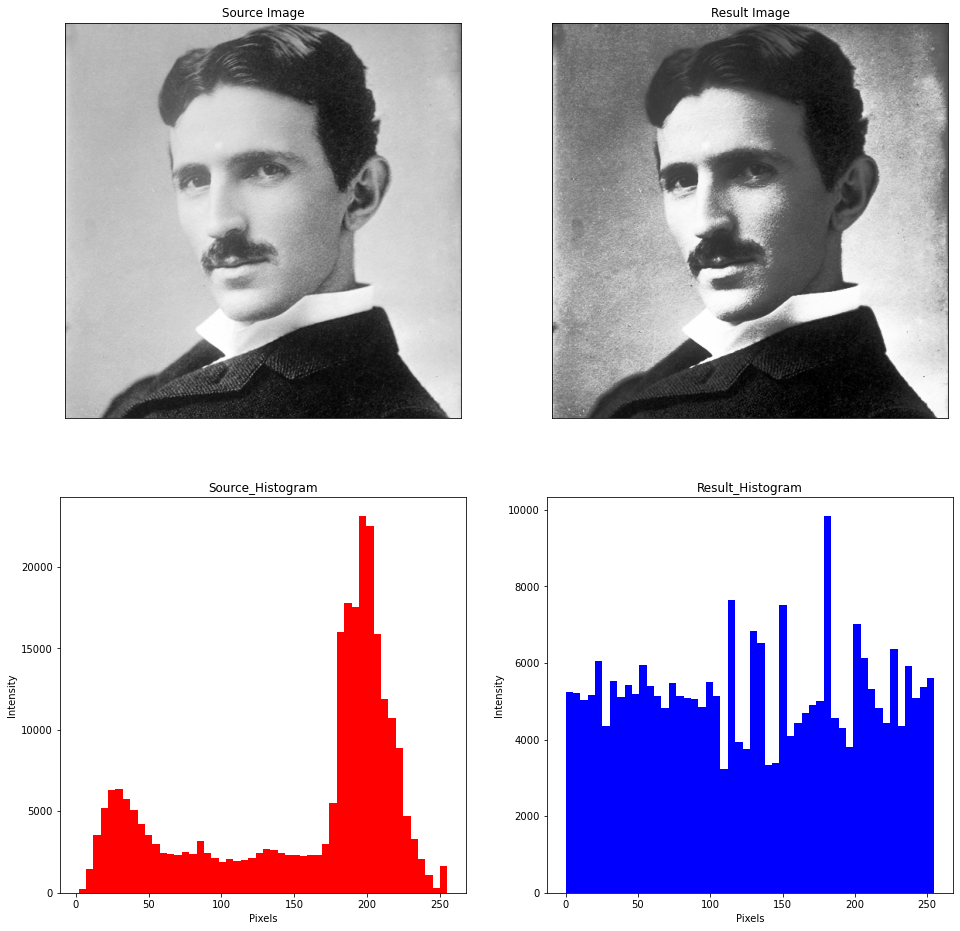

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open('tesla.jpg') #get image
img = img.resize((512,512)) #resize image
img_array = np.asarray(img) #convert to array

hist = np.zeros(256)

#loop through pixels and return it as list of pixel freq
for pixel in img_array.flatten(): 
    hist[pixel]+=1                

#normalize each hist
total_pixels = np.sum(hist)
normalized_hist = hist/total_pixels 

#Cumulative summation
iter_hist = iter(normalized_hist)
cum_sum = [next(iter_hist)]
for i in iter_hist:
    cum_sum.append(cum_sum[-1] + i)

cum_sum = np.array(cum_sum)

#Formula (explained in 2.6)
transform = np.floor(255 * cum_sum).astype(np.uint8) #2^8 -1 = 255 

out_list = list(img_array.flatten()) #convert 2D to 1D

# transform each pixel
out_img = [transform[p] for p in out_list]

# reshape and return into img_array (for picture)
out_img_array = np.reshape(np.asarray(out_img), img_array.shape)

#plot image
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.title("Source Image")
plt.yticks([]),plt.xticks([])
plt.imshow(img, cmap='gray')

plt.subplot(2,2,2)
plt.title("Result Image")
plt.yticks([]),plt.xticks([])
plt.imshow(out_img_array, cmap="gray")

#plot histogram
plt.subplot(2,2,3)
plt.title("Source_Histogram")
plt.xlabel("Pixels")
plt.ylabel("Intensity")
plt.hist(img_array.flatten(),color="red", bins=50)

plt.subplot(2,2,4)
plt.title("Result_Histogram")
plt.xlabel("Pixels")
plt.ylabel("Intensity")
plt.hist(out_img, color="blue",bins=50)

print('Source Image = ',img_array)
print('Result Image = ', out_img_array)

Sebagaimana bisa kita lihat disini, gambar tersebut punya puncak primer yang tinggi yang berarti menunjukkan gambar tersebut tidak memiliki kontras yang baik. Oleh karena itu, kita perlu untuk melakukan transformasi sehingga menghasilkan kontras yang lebih baik. (kiri buruk, kanan baik)